In [22]:
#Youtube: https://www.youtube.com/watch?v=vSzou5zRwNQ&ab_channel=ComputerScience

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
Data = pd.read_csv('fulldata.csv')

In [25]:
Data.head

<bound method NDFrame.head of                           name     energy   diag      pca1      pca2      pca3
0           acetaldehyde_0_015  38.145186  0.378  0.842622 -0.531091  0.067095
1           acetaldehyde_0_015   0.573634  0.005  0.463136  0.636858 -0.534280
2           acetaldehyde_0_015   0.580474  0.005  0.264667  0.540074  0.553770
3           acetaldehyde_0_015  37.980501  0.378  0.029347  0.105040  0.245169
4           acetaldehyde_0_015  75.370940  0.754  0.044385  0.049707  0.439767
...                        ...        ...    ...       ...       ...       ...
189483  vinylacetate_occscan_9  38.019840  0.378  0.036313  0.040589 -0.055911
189484  vinylacetate_occscan_9  38.121546  0.378  0.033934  0.041472 -0.123830
189485  vinylacetate_occscan_9   0.574945  0.005  0.028167 -0.001278 -0.029696
189486  vinylacetate_occscan_9   0.577973  0.005  0.024077  0.006063 -0.010935
189487  vinylacetate_occscan_9   0.577448  0.005  0.021231 -0.002702 -0.014683

[189488 rows x 6 colu

In [26]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189488 entries, 0 to 189487
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    189488 non-null  object 
 1   energy  189488 non-null  float64
 2   diag    189488 non-null  float64
 3   pca1    189488 non-null  float64
 4   pca2    189488 non-null  float64
 5   pca3    189488 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.7+ MB


,count,mean,std,min,25%,50%,75%,max
energy,189488.0,23.224939,24.828596,0.280758,0.578519,35.489707,38.119598,99.991317
diag,189488.0,0.233942,0.251381,0.005000,0.005000,0.378000,0.378000,1.000000
pca1,189488.0,0.126102,0.193949,-0.878344,0.023608,0.057811,0.193317,0.996973
pca2,189488.0,0.053110,0.225161,-0.983825,-0.010437,0.022784,0.175336,0.979041
pca3,189488.0,-0.000552,0.231339,-0.960883,-0.062514,0.008743,0.097253,0.981669


In [27]:
null_counts = Data.isna().sum()
null_counts

name      0
energy    0
diag      0
pca1      0
pca2      0
pca3      0
dtype: int64

<AxesSubplot: >

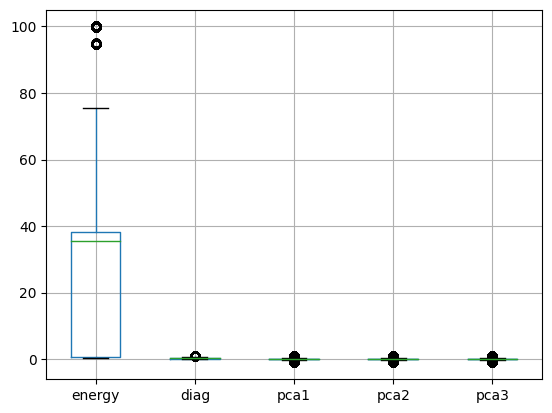

In [28]:
features = ['energy','diag','pca1', 'pca2', 'pca3']
Data.boxplot(features)


<AxesSubplot: >

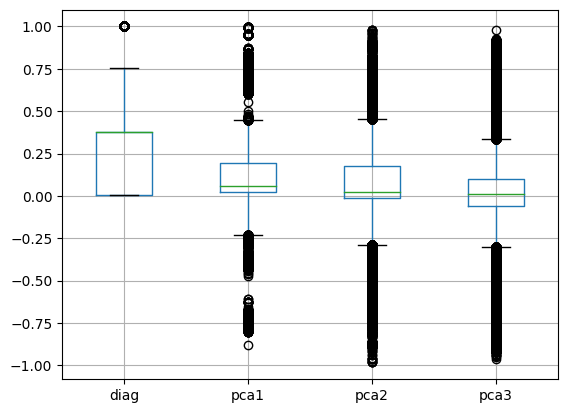

In [29]:
features = ['diag','pca1', 'pca2', 'pca3']
Data.boxplot(features)


<AxesSubplot: >

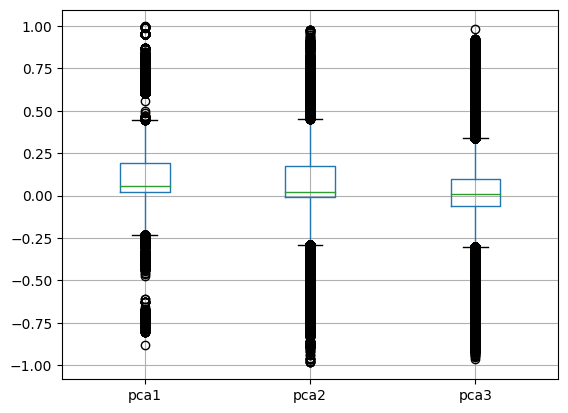

In [30]:
features = ['pca1', 'pca2', 'pca3']
Data.boxplot(features)


In [31]:
selected_features = ['diag','pca1','pca2','pca3']
X = Data[selected_features]

In [32]:
selected_features = ['diag', 'pca1', 'pca2', 'pca3']
Data['count'] = Data.groupby('name')['name'].transform('count')
bins = [0, 13, 20, float("inf")]
labels = ['0-13', '14-20', '20+']
Data['Bin'] = pd.cut(Data['count'], bins=bins, labels=labels)

X = Data[selected_features + ['Bin']]  # Include 'Bin' column
X = pd.get_dummies(X, columns=['Bin'])

In [33]:
target =  ['energy']
y = Data[target]

In [34]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
X_scale = max_abs_scaler.fit_transform(X)
X_scale

array([[ 0.378     ,  0.84518036, -0.53982263, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.005     ,  0.46454217,  0.64732854, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.005     ,  0.26547058,  0.54895332, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.005     ,  0.02825252, -0.00129901, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.005     ,  0.0241501 ,  0.00616268, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.005     ,  0.02129546, -0.00274642, ...,  1.        ,
         0.        ,  0.        ]])

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.reshaping.flatten import Flatten
from sklearn.model_selection import train_test_split

In [36]:
# import necessary libraries
from sklearn.model_selection import train_test_split


X_train, X_temp, Y_train, Y_temp = train_test_split(X_scale, y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(132641, 7) (38087, 7) (18760, 7) (132641, 1) (38087, 1) (18760, 1)


In [37]:
#ChatGPT
from sklearn.model_selection import train_test_split

# Split data into training and combined validation/testing sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

# Split combined validation/testing set into separate validation and testing sets
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.33, random_state=42)

# Print shapes of all sets
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(132641, 7) (38087, 7) (18760, 7) (132641, 1) (38087, 1) (18760, 1)


In [38]:
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.2)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
# print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [39]:
# model = Sequential()
# model.add(Dense(units = 48, input_dim = 4, activation = 'relu'))
# model.add(Dense(units = 48, activation='relu'))
# model.add(Dense(units = 32, activation='relu'))
# model.add(Dense(units = 32, activation='relu'))
# model.add(Flatten())
# model.add(Dense(units = 1))

In [40]:
model = Sequential()
model.add(Dense(units = 48, input_dim = 7))
model.add(Dense(units = 48, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Flatten())
model.add(Dense(units = 1))

In [41]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [42]:
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs = 200,
    validation_data=(X_val, Y_val)
)

Epoch 1/200
4146/4146 [==============================] - 22s 5ms/step - loss: 19.9955 - mae: 1.0655 - val_loss: 1.5985 - val_mae: 0.8190
Epoch 2/200
4146/4146 [==============================] - 17s 4ms/step - loss: 0.6526 - mae: 0.4778 - val_loss: 0.5991 - val_mae: 0.4153
Epoch 3/200
4146/4146 [==============================] - 16s 4ms/step - loss: 0.5877 - mae: 0.4513 - val_loss: 1.5466 - val_mae: 0.7593
Epoch 4/200
4146/4146 [==============================] - 18s 4ms/step - loss: 0.5732 - mae: 0.4443 - val_loss: 1.0402 - val_mae: 0.7161
Epoch 5/200
4146/4146 [==============================] - 17s 4ms/step - loss: 0.5257 - mae: 0.4253 - val_loss: 0.5508 - val_mae: 0.4484
Epoch 6/200
4146/4146 [==============================] - 17s 4ms/step - loss: 0.4969 - mae: 0.4120 - val_loss: 0.4710 - val_mae: 0.4381
Epoch 7/200
4146/4146 [==============================] - 16s 4ms/step - loss: 0.4799 - mae: 0.4018 - val_loss: 0.4775 - val_mae: 0.3942
Epoch 8/200
4146/4146 [========================

In [43]:
model.evaluate(X_test, Y_test)

587/587 [==============================] - 1s 2ms/step - loss: 0.2390 - mae: 0.2582


[0.2390051633119583, 0.25817111134529114]

In [44]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

587/587 [==============================] - 1s 2ms/step - loss: 0.2390 - mae: 0.2582
Test loss: 0.239, Test MAE: 0.258


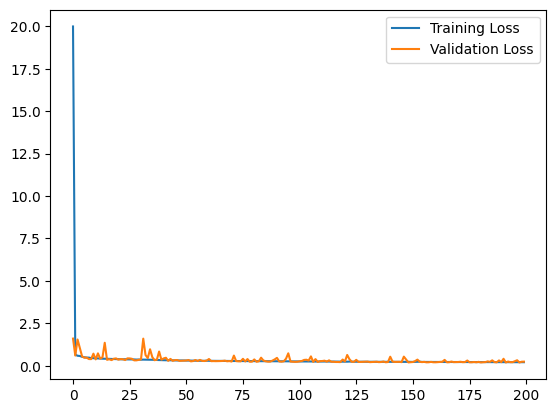

4146/4146 [==============================] - 10s 2ms/step - loss: 0.2337 - mae: 0.2560
Train loss: 0.234, Train MAE: 0.256
587/587 [==============================] - 1s 2ms/step - loss: 0.2390 - mae: 0.2582
Test loss: 0.239, Test MAE: 0.258

4146/4146 [==============================] - 11s 2ms/step
   Predicted Energy  Actual Energy
0         37.130547      35.533061
1         36.865570      38.118238
2          0.491221       0.581109
3          0.501700       0.410339
4          0.558682       0.586390
5         37.984715      38.052270
6          0.575933       0.577919
7          0.575933       0.582940
8          0.532807       0.583850
9         38.594276      38.072458


In [45]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# Calculate MAE for training and test set

# Evaluate the model on the test set
train_loss, train_mae = model.evaluate(X_train, Y_train)
print(f"Train loss: {train_loss:.3f}, Train MAE: {train_mae:.3f}")

test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}\n")

predicted_output_train = model.predict(X_train)
actual_output_train = Y_train.values.flatten()
predicted_output_train_flat = predicted_output_train.flatten()
actual_output_train_flat = actual_output_train.flatten()
df_train = pd.DataFrame({'Predicted Energy': predicted_output_train_flat, 'Actual Energy': actual_output_train_flat})
print(df_train.head(10))


In [46]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

587/587 [==============================] - 2s 2ms/step - loss: 0.2390 - mae: 0.2582
Test loss: 0.239, Test MAE: 0.258


In [47]:
# Evaluate the model on the test set
train_loss, train_mae = model.evaluate(X_train, Y_train)
print(f"Train loss: {train_loss:.3f}, Train MAE: {train_mae:.3f}")

4146/4146 [==============================] - 10s 2ms/step - loss: 0.2337 - mae: 0.2560
Train loss: 0.234, Train MAE: 0.256


In [48]:
predicted_output_train = model.predict(X_train)
actual_output_train = Y_train.values.flatten()
predicted_output_train_flat = predicted_output_train.flatten()
actual_output_train_flat = actual_output_train.flatten()
df_train = pd.DataFrame({'Predicted Energy': predicted_output_train_flat, 'Actual Energy': actual_output_train_flat})
print(df_train.head(10))


4146/4146 [==============================] - 10s 2ms/step
   Predicted Energy  Actual Energy
0         37.130547      35.533061
1         36.865570      38.118238
2          0.491221       0.581109
3          0.501700       0.410339
4          0.558682       0.586390
5         37.984715      38.052270
6          0.575933       0.577919
7          0.575933       0.582940
8          0.532807       0.583850
9         38.594276      38.072458
